# 0.0 Imports 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats
#from scipy.stats import t

#Biblioteca pingouin
import pingouin as pg

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera

## 0.1 Helper Functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# 8.3 Teste de Hipótese relativos aos coeficientes individuais de regressão

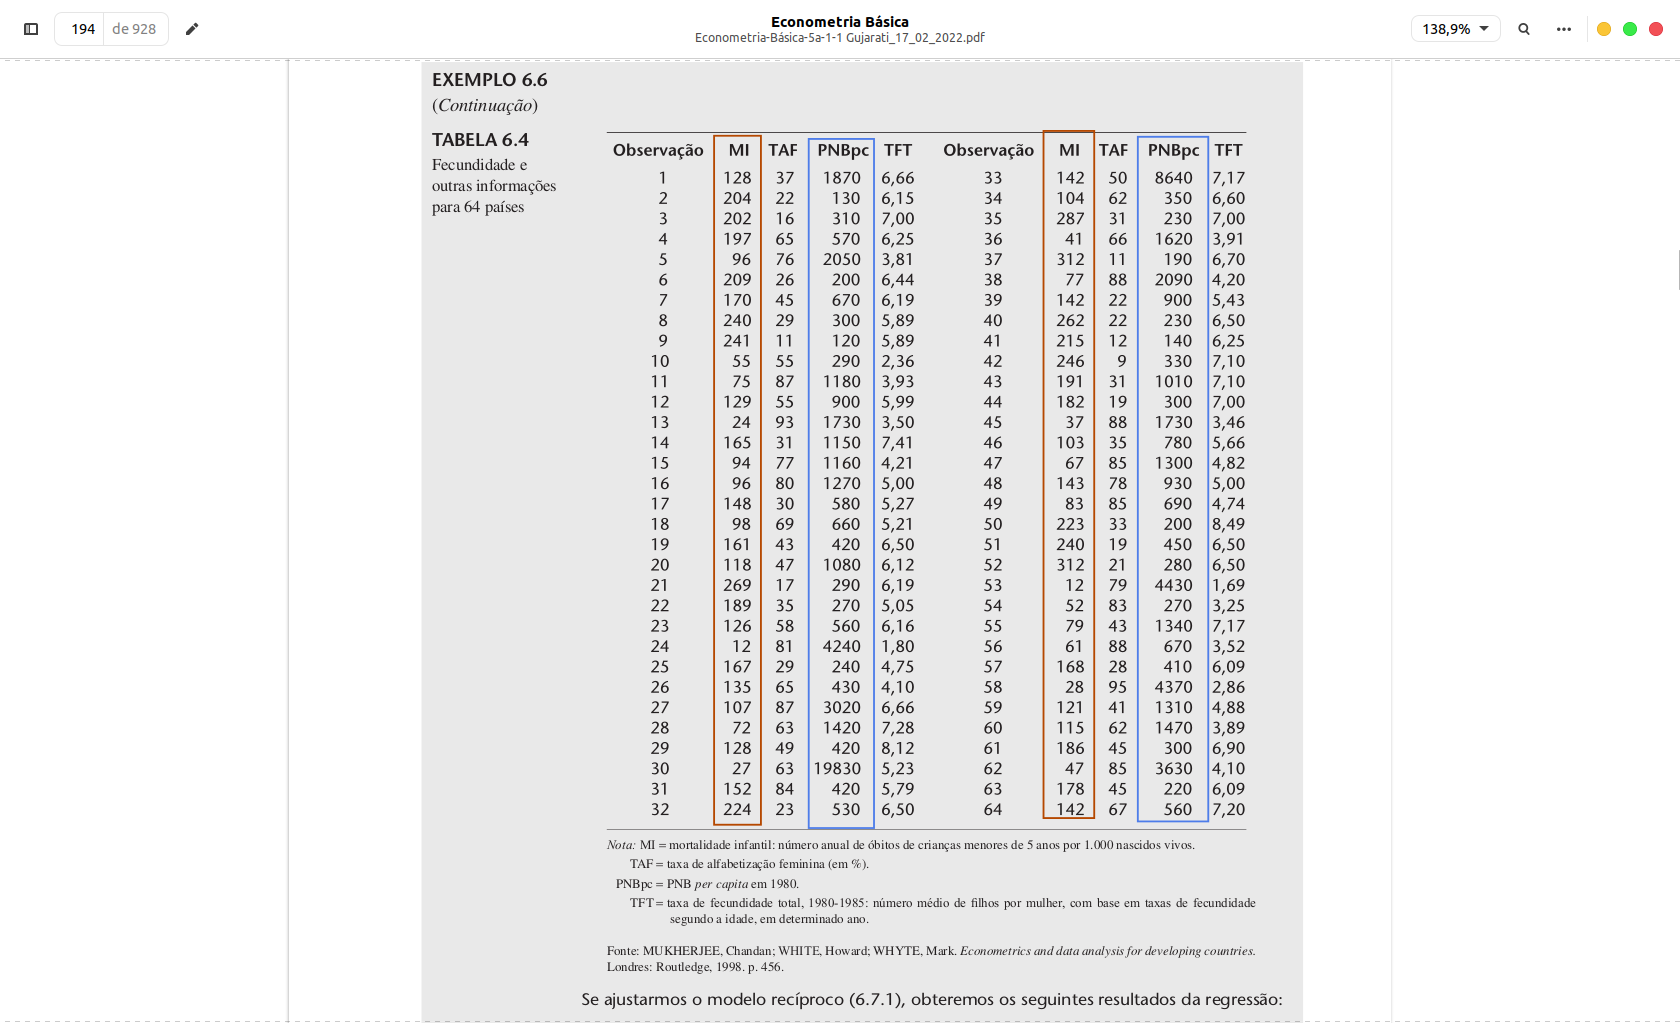

In [5]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.6_2.png')

In [6]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

,observacao,mi,taf,pnbpc,tft
0,1,128,37,1870,6.6600
1,2,204,22,130,6.1500
2,3,202,16,310,7.0000
3,4,197,65,570,6.2500
4,5,96,76,2050,3.8100


## Regressão - Pingouin

In [7]:
#biblioteca Pingouin
pg.linear_regression(data[['pnbpc', 'taf']], data['mi'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,263.6416,11.5932,22.7411,0.0000,0.7077,0.6981,240.4596,286.8236
1,pnbpc,-0.0056,0.0020,-2.8187,0.0065,0.7077,0.6981,-0.0097,-0.0016
2,taf,-2.2316,0.2099,-10.6293,0.0000,0.7077,0.6981,-2.6514,-1.8118


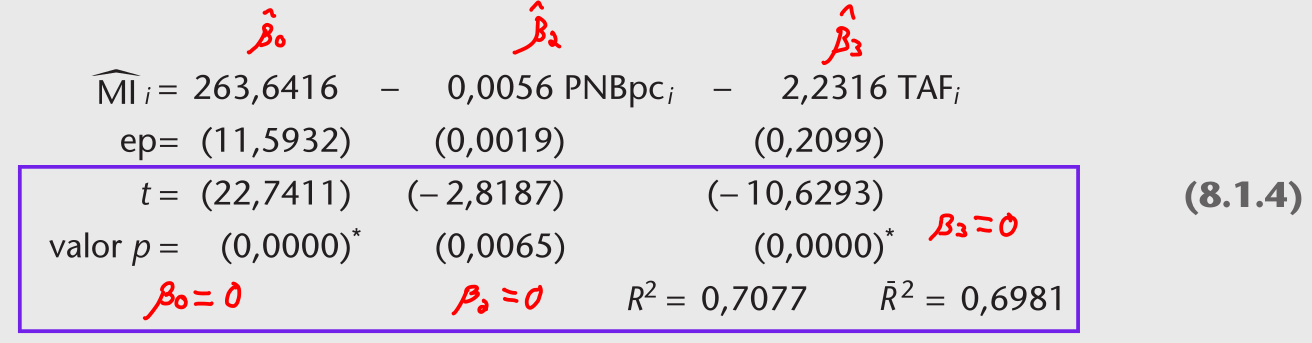

In [8]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.1_1.png')

In [9]:
# parametro relimp = True
lm = pg.linear_regression(data[['pnbpc', 'taf']], data['mi'], relimp = True)
lm.head()

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,263.6416,11.5932,22.7411,0.0000,0.7077,0.6981,240.4596,286.8236,NaN,NaN
1,pnbpc,-0.0056,0.0020,-2.8187,0.0065,0.7077,0.6981,-0.0097,-0.0016,0.1021,14.4343
2,taf,-2.2316,0.2099,-10.6293,0.0000,0.7077,0.6981,-2.6514,-1.8118,0.6055,85.5657


In [10]:
#residuos - desvios do modelo
lm.residuals_

array([-42.51378125,  -9.8126422 , -24.18576952,  81.63004598,
        13.53444935,   4.50896236,  10.56299083,  42.76837904,
         2.58344881, -84.26685789,  12.16935491,  -6.82243505,
       -22.33550355, -22.9688439 ,   8.7405657 ,  18.05644832,
       -45.41898868,  -7.93541756,  -4.31182934, -34.65873384,
        44.93288431,   4.98849558,  -5.04752009, -46.94157934,
       -30.57041665,  18.8395227 ,  54.55908937, -43.03351989,
       -23.92231495,  15.92029068,  78.18318565,  14.67758146,
        38.72428017, -19.30696208,  93.83628887, -66.20944374,
        73.97871044,  21.53934192, -67.46476419,  48.75201728,
       -21.07203357,   4.30606225,   2.24063282, -37.54747828,
       -20.49343221, -78.13174106,   0.38377482,  58.67343462,
        12.93935198,  34.13006248,  21.29951095,  96.80276129,
       -50.33189779, -24.8953893 , -81.11696211,  -2.47882272,
       -30.84208126,   1.03467822, -43.74953142,  -1.98277588,
        24.47375074,  -6.45965925,  16.02202316,  31.03

In [11]:
#graus de liberdade do modelo
lm.df_model_

2

In [12]:
#graus de liberdade dos residuos - desvios
lm.df_resid_ 

61

## Regressão Statsmodels

In [13]:
#statsmodels
print(' Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u \n')
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        08:22:02   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


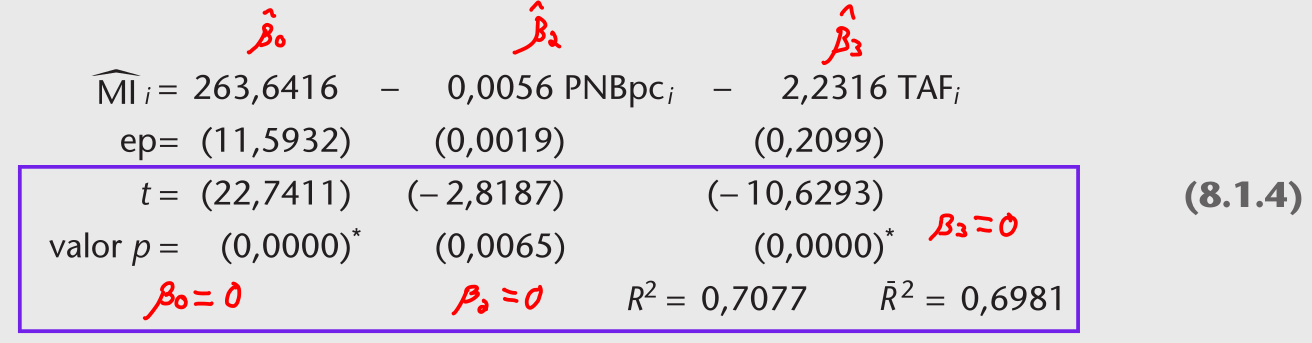

In [14]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_8.1_1.png')

In [15]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

,observacao,mi,taf,pnbpc,tft,predict_mi,u1
0,1,128,37,1870,6.6600,170.5138,-42.5138
1,2,204,22,130,6.1500,213.8126,-9.8126
2,3,202,16,310,7.0000,226.1858,-24.1858
3,4,197,65,570,6.2500,115.3700,81.6300
4,5,96,76,2050,3.8100,82.4656,13.5344
5,6,209,26,200,6.4400,204.4910,4.5090
6,7,170,45,670,6.1900,159.4370,10.5630
7,8,240,29,300,5.8900,197.2316,42.7684
8,9,241,11,120,5.8900,238.4166,2.5834
9,10,55,55,290,2.3600,139.2669,-84.2669


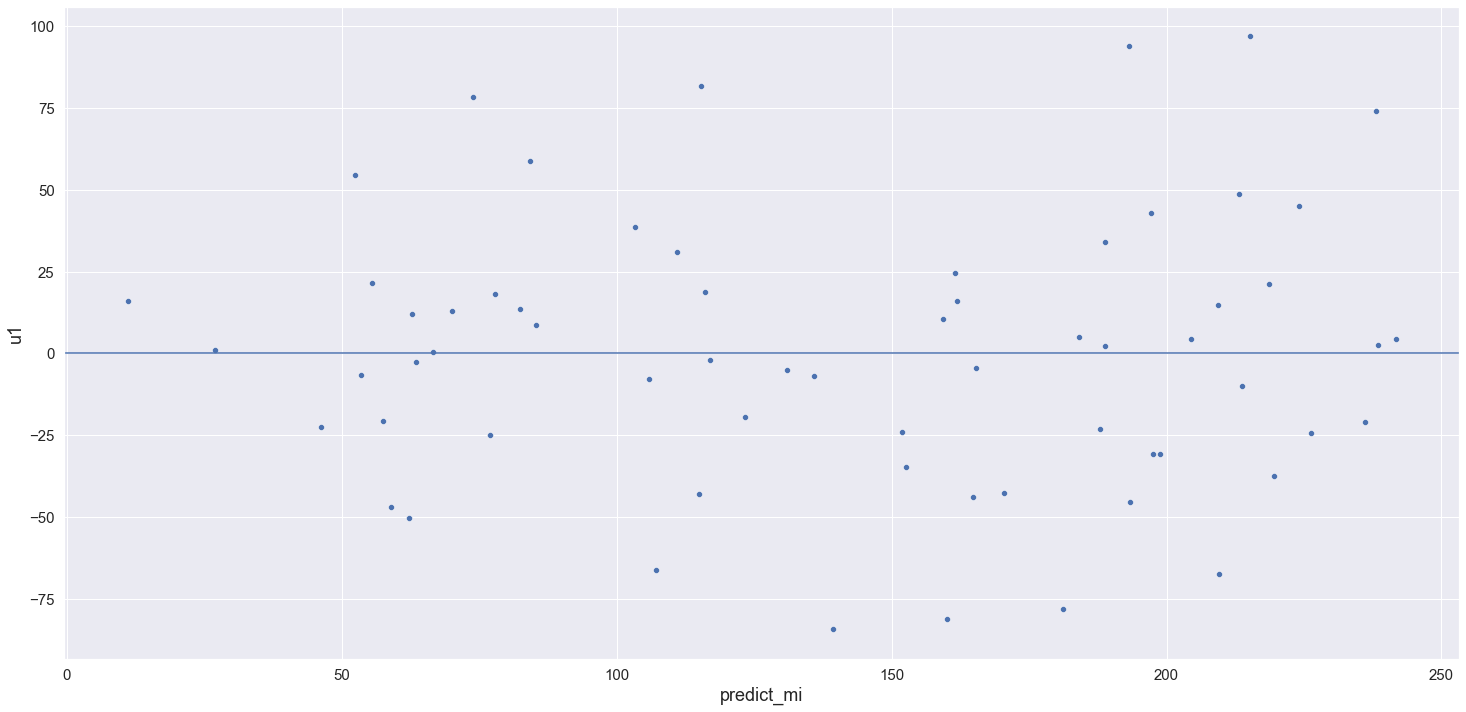

In [16]:
#dispersão dos resíduos
sns.scatterplot(x = 'predict_mi', y = 'u1', data = data );
plt.axhline(y=0);

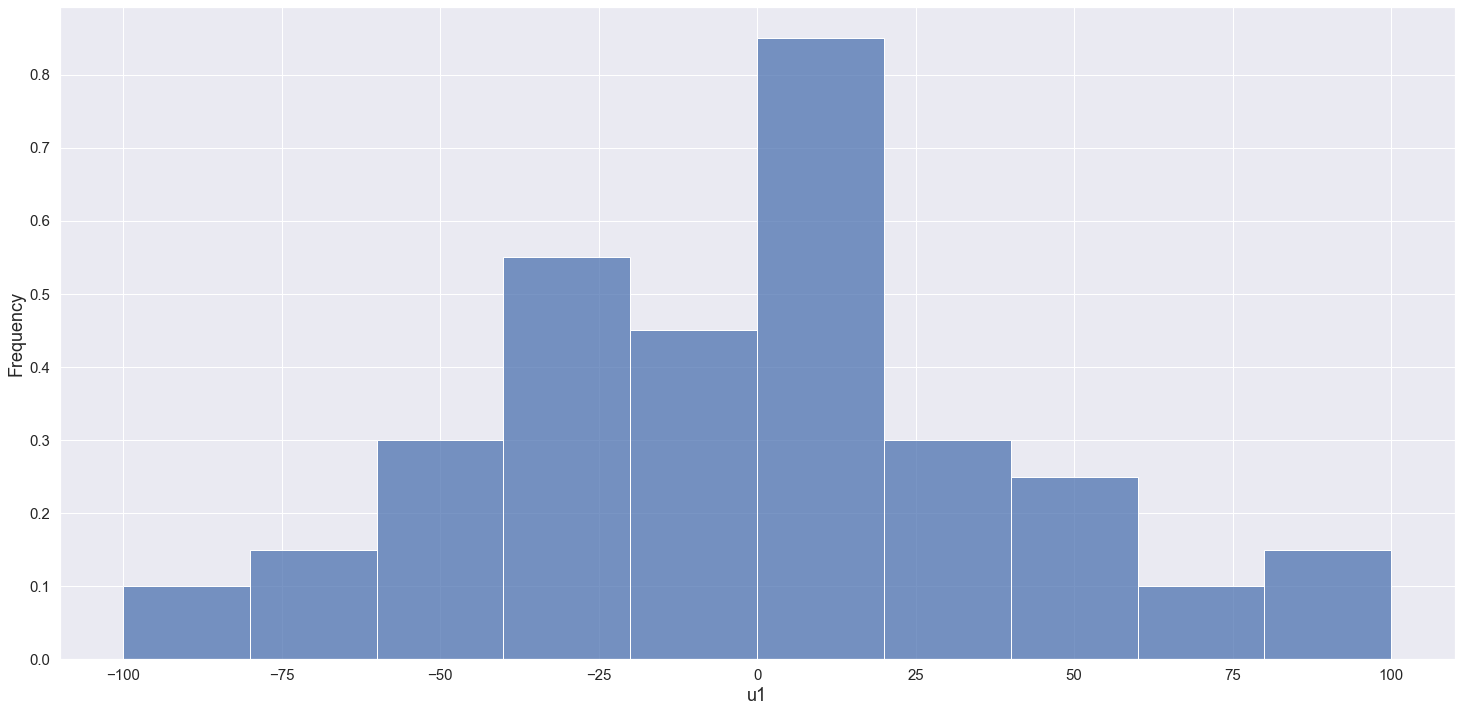

In [17]:
#histograma dos resíduos
sns.histplot(x = 'u1', data = data, stat = 'frequency', binrange = (-100,100));

In [18]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data['u1'])
jb

(0.5594048565247834,
 0.7560086748021702,
 0.22757474140642056,
 2.948855406033511)

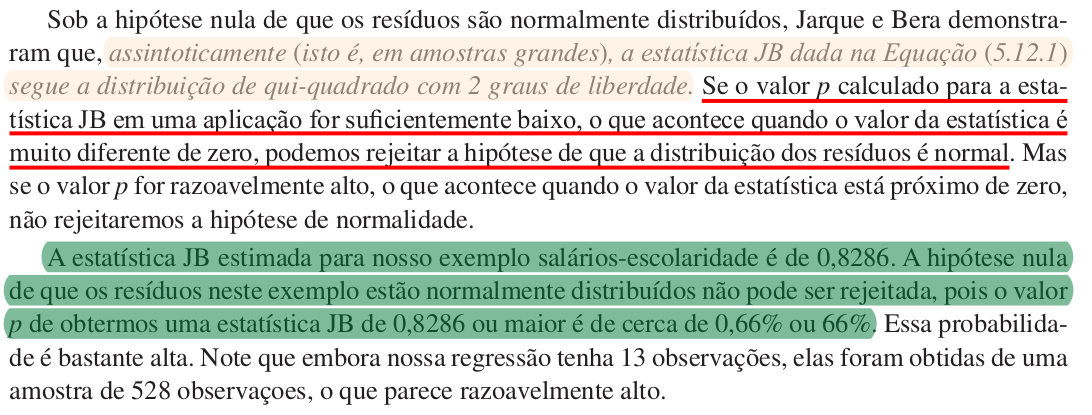

In [19]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_2.png')

In [20]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.7321316498990778
0.6934571529252757


$H_0$ a amostra é proveniente de uma distribuição normal.

$H_1$ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

## Função Densidade de Probabilidade - Distribuição  t de student - Tabela t

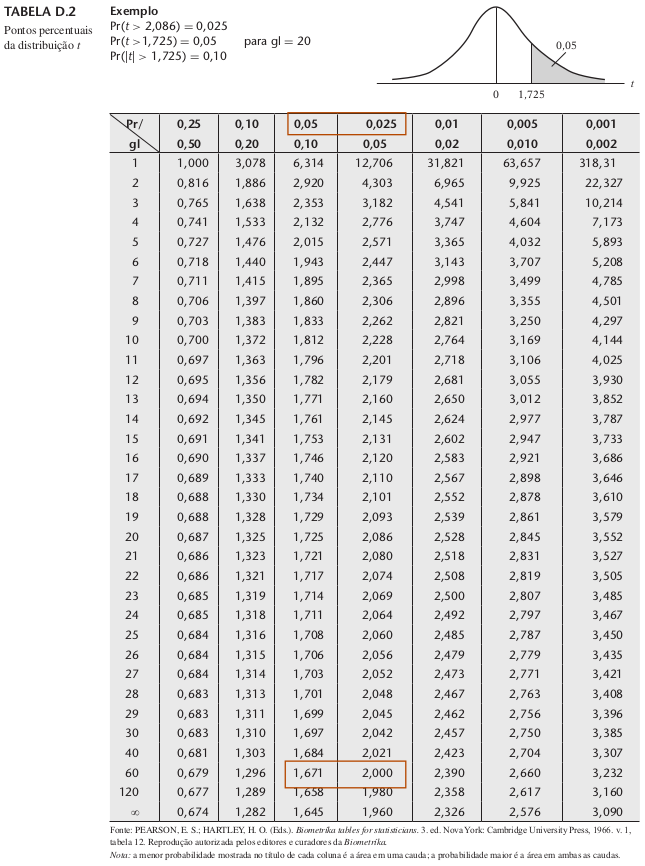

In [21]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_d2_1.png')

## Função Densidade de Probabilidade - Distribuição  t de student - Scipy

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [22]:
# stats.t.pdf() Calcula a Função densidade de probabilidade - distribuição t
#     x      --> dominio 
#     .pdf() --> Probability density function
#     df     --> graus de liberdade
#     loc    --> valor central = 0 
#     scale  --> desvio padrao / erro padrao = 1
    
domain = np.linspace( -4,4,1000 )
d_t = stats.t.pdf(domain, df = 60, loc = 0, scale = 1)

In [23]:
d_t

array([2.93696764e-04, 3.01341094e-04, 3.09175148e-04, 3.17203354e-04,
       3.25430236e-04, 3.33860413e-04, 3.42498604e-04, 3.51349629e-04,
       3.60418410e-04, 3.69709972e-04, 3.79229448e-04, 3.88982079e-04,
       3.98973216e-04, 4.09208322e-04, 4.19692976e-04, 4.30432870e-04,
       4.41433819e-04, 4.52701755e-04, 4.64242735e-04, 4.76062941e-04,
       4.88168681e-04, 5.00566394e-04, 5.13262651e-04, 5.26264156e-04,
       5.39577750e-04, 5.53210415e-04, 5.67169272e-04, 5.81461586e-04,
       5.96094770e-04, 6.11076385e-04, 6.26414144e-04, 6.42115912e-04,
       6.58189714e-04, 6.74643731e-04, 6.91486309e-04, 7.08725956e-04,
       7.26371349e-04, 7.44431335e-04, 7.62914935e-04, 7.81831343e-04,
       8.01189933e-04, 8.21000264e-04, 8.41272074e-04, 8.62015292e-04,
       8.83240037e-04, 9.04956621e-04, 9.27175552e-04, 9.49907541e-04,
       9.73163497e-04, 9.96954538e-04, 1.02129199e-03, 1.04618739e-03,
       1.07165250e-03, 1.09769929e-03, 1.12433995e-03, 1.15158690e-03,
      

In [24]:
len(d_t)

1000

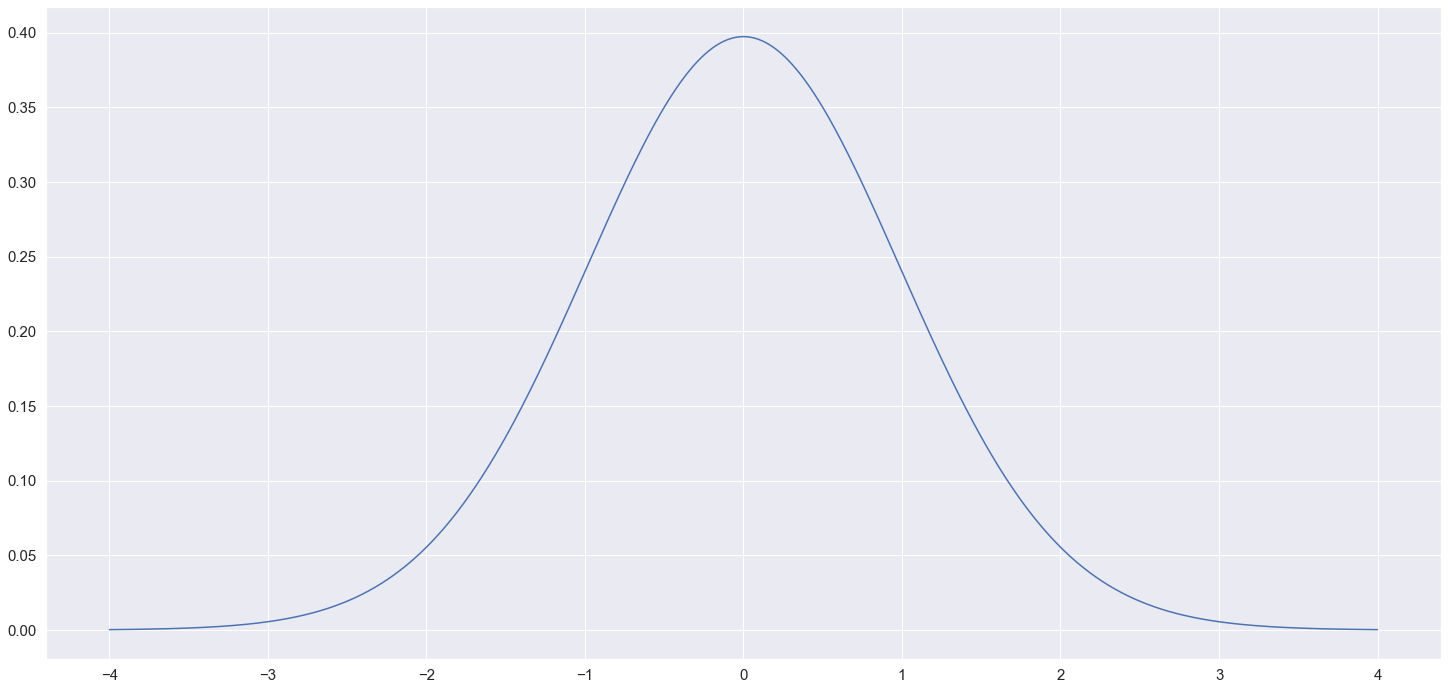

In [25]:
plt.plot(domain, d_t);

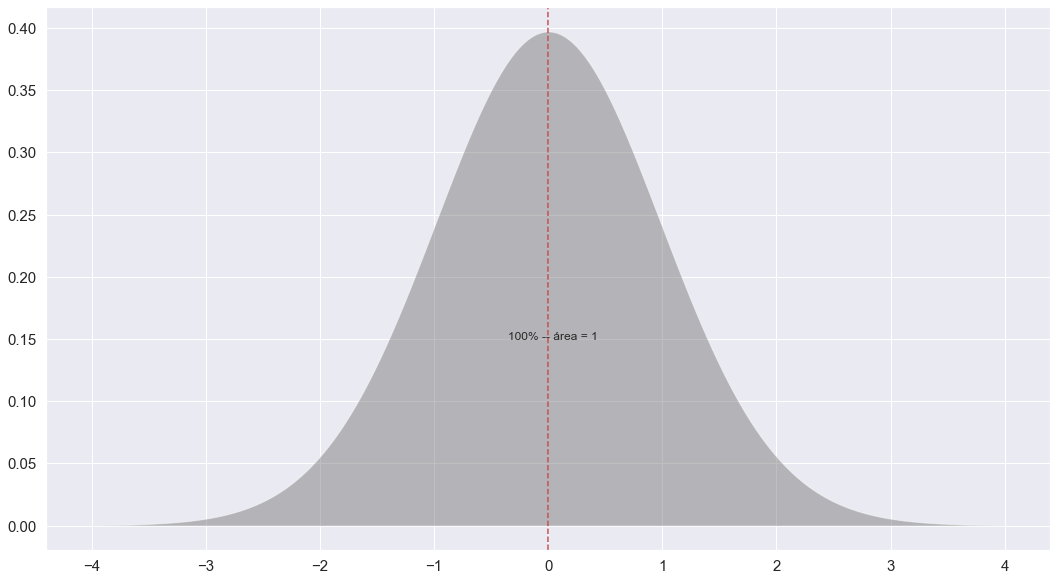

In [26]:
plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );
plt.text( x= -0.35, y= 0.15, s = "100% -- área = 1");
plt.axvline( x = 0, color = 'r', linestyle = '--');

## Valor t de acordo com o nível de significância e graus de liberdade da amostra

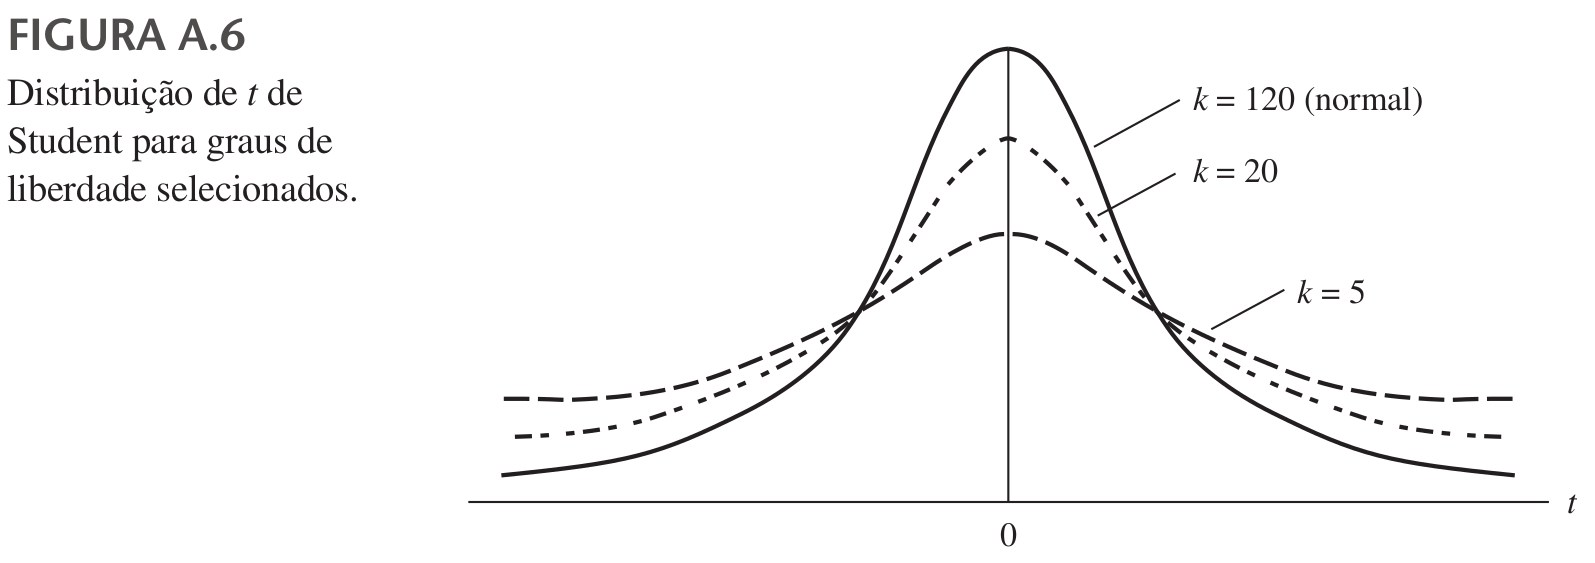

In [27]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/dist_t_student_gl.png')

### Alterando os graus de liberdade - Amostra com 64 elementos - 60 graus de liberdade*

In [28]:
# stats.t.ppf() - calcula o valor t de acordo com nível de significancia escolhido.
#     .ppf --> Percent point function (inverse of cdf — percentiles).
#     q    --> quantile - nível de significancia desejado
#     df   --> graus de liberdade 

# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 60)
cauda_1

-2.000297821058262

In [29]:
# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 60, loc = 0, scale = 1)
cauda_2

2.0002978210582616

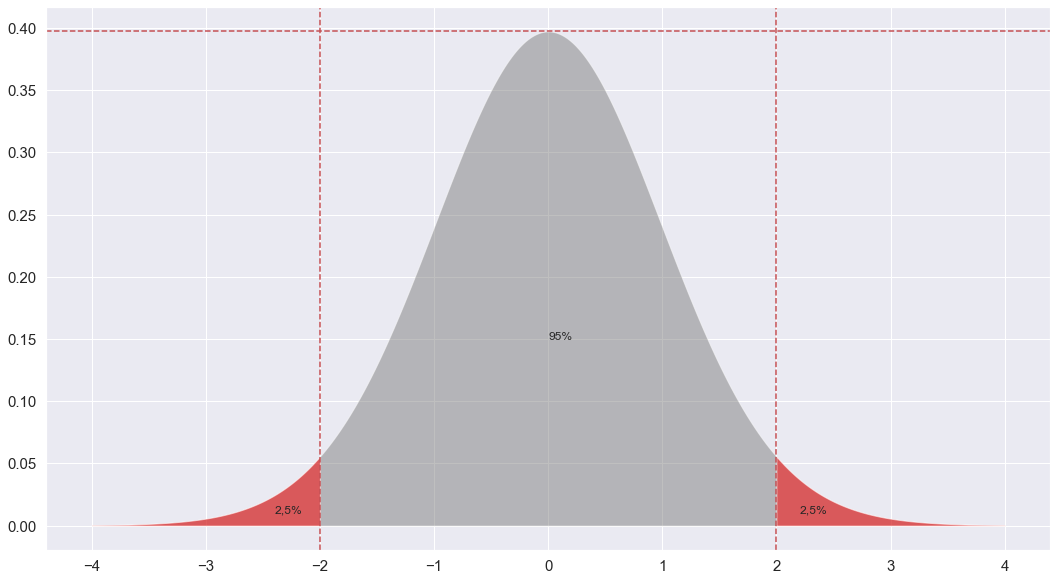

In [30]:
plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );


plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.3975, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.2, y= 0.01, s = "2,5%");
plt.text( x= -2.4, y= 0.01, s = "2,5%");

### Alterando os graus de liberdade - Amostra com 13 elementos - 10 graus de liberdade

valor t cauda 1: -2.2281388519649385 

valor t cauda 2: 2.2281388519649385 



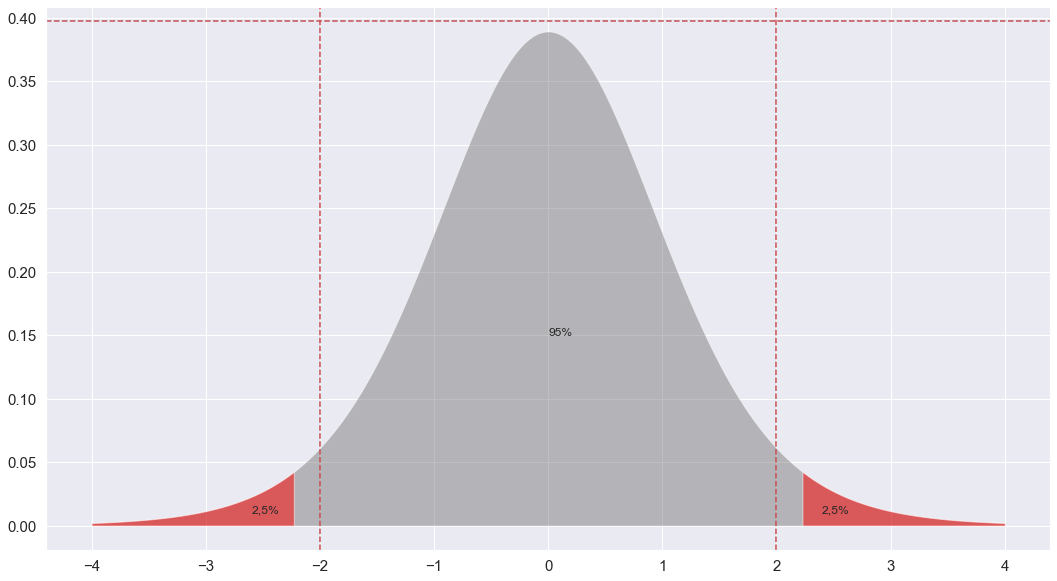

In [31]:
# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 10)
print('valor t cauda 1: {}'.format(cauda_1), '\n')

# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 10)
print('valor t cauda 2: {}'.format(cauda_2), '\n')

plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 10, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.3975, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.4, y= 0.01, s = "2,5%");
plt.text( x= -2.6, y= 0.01, s = "2,5%");

### Alterando os graus de liberdade - Amostra com 8 elementos - 5 graus de liberdade

valor t cauda 1: -2.57058183661474 

valor t cauda 2: 2.5705818366147395 



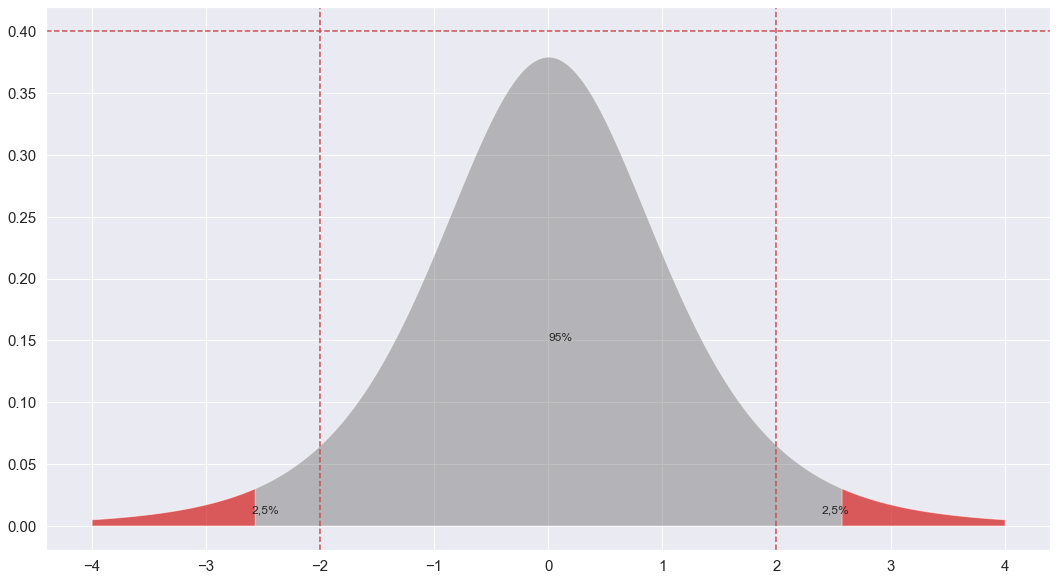

In [32]:
# Primeira cauda
cauda_1 = stats.t.ppf(q = 0.025, df = 5)
print('valor t cauda 1: {}'.format(cauda_1), '\n')

# segunda cauda
cauda_2 = stats.t.ppf(q = 0.975, df = 5)
print('valor t cauda 2: {}'.format(cauda_2), '\n')

plt.figure( figsize = (18,10) )

domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 5, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

plt.axvline( x = -2, color = 'r', linestyle = '--');
plt.axvline( x = 2, color = 'r', linestyle = '--');
plt.axhline( y = 0.4, color = 'r', linestyle = '--');
plt.text( x= 0, y= 0.15, s = "95%");
plt.text( x=  2.4, y= 0.01, s = "2,5%");
plt.text( x= -2.6, y= 0.01, s = "2,5%");

## Calculando o p-valor - Abordagem nível de significância

In [33]:
# stats.t.cdf() - calculando o p-valor a partir do valor t 

# teste de bicaudal
#     .cdf() --> Cumulative distribution function
#     x    --> valor t
#     df   --> graus de liberdade
#     2    --> duas caudas

### Cauda negativa

In [34]:
# cauda negativa
p_valor = stats.t.cdf( x = -2.8187, df = 60, loc = 0, scale = 1 )
p_valor

0.0032611415169248007

### Cauda Positiva

In [35]:
# cauda positiva
p_valor = 1 - stats.t.cdf( x = +2.8187, df = 60, loc = 0, scale = 1 )
p_valor

0.0032611415169248037

### Duas caudas

In [36]:
# para testes de duas caudas multiplicar por 2
p_valor = stats.t.cdf( x = -2.8187, df = 60, loc = 0, scale = 1 )*2
p_valor

0.006522283033849601

In [37]:
# para testes de duas caudas multiplicar por 2
p_valor = ( 1 - stats.t.cdf( x = +2.8187, df = 60, loc = 0, scale = 1 ) )*2
p_valor

0.006522283033849607

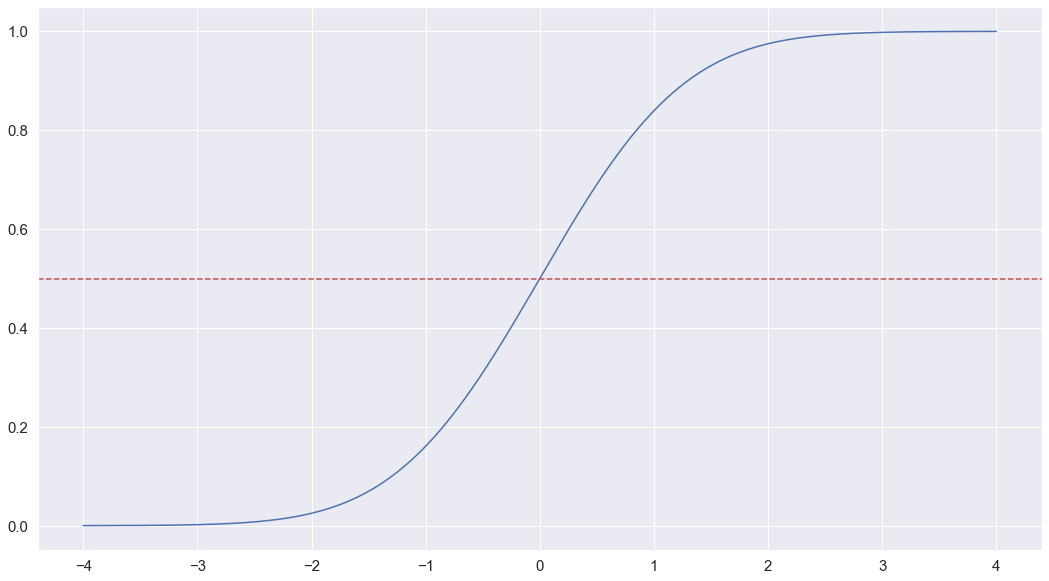

In [38]:
fig = plt.figure(figsize=( 18,10) )

domain = np.linspace( -4,4,1000 )
plt.plot( domain,stats.t.cdf(domain, df = 60, loc = 0, scale = 1) )
axhline( 0.5, color = 'r', linestyle = '--');

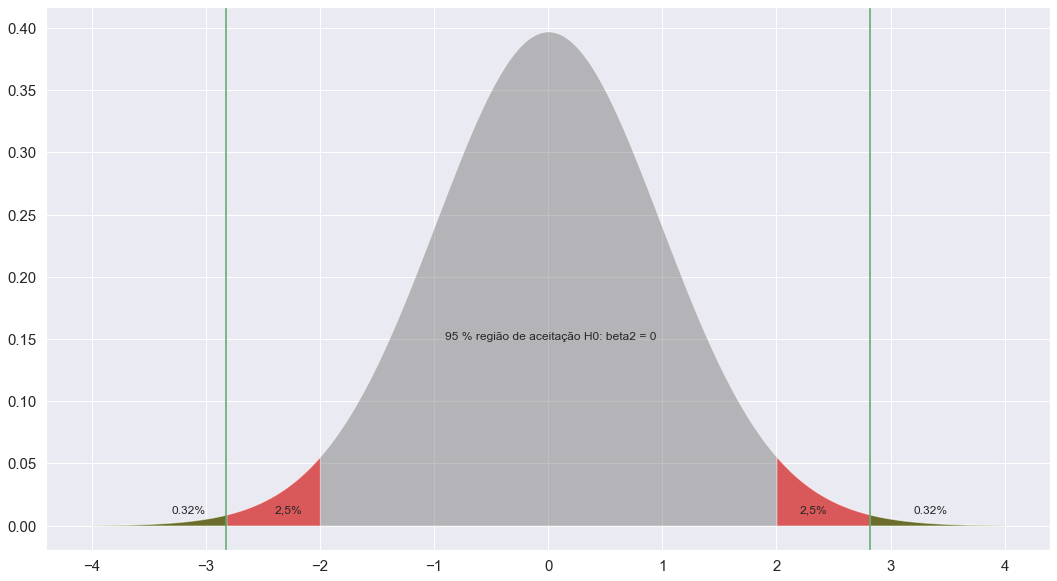

In [39]:
cauda_1 = stats.t.ppf(q = 0.025, df = 60, loc = 0, scale = 1)
cauda_2 = stats.t.ppf(q = 0.975, df = 60, loc = 0, scale = 1)

plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -4,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

# tabela - nivel significância 5% teste Bicaudal
domain = np.linspace( -4,cauda_1,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( cauda_2,4,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'red', alpha = 0.5 );
#p-valor
domain = np.linspace( -4, -2.8187,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'green', alpha = 0.5 );

domain = np.linspace( 2.8187, 4, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = 0, scale = 1),
                  facecolor = 'green', alpha = 0.5 );

plt.axvline( x = -2.8187, color = 'g', linestyle = '-');
plt.axvline( x =  2.8187, color = 'g', linestyle = '-');

plt.text( x= -0.9, y= 0.15, s = "95 % região de aceitação H0: beta2 = 0");
plt.text( x=  3.2, y= 0.01, s = "0.32%");
plt.text( x=  2.2, y= 0.01, s = "2,5%" );
plt.text( x= -2.4, y= 0.01, s = "2,5%" );
plt.text( x= -3.3, y= 0.01, s = "0.32%");

## Abordagem Intervalo de confiança

In [40]:
# Intervalo de confiança
#     .interval --> Endpoints of the range that contains fraction alpha [0, 1] of the distribution
#     df        --> graus de liberdade
#     loc       --> valor central onde vamos construir o intervalo --> na regressão -->  beta 2
#     scale     --> desvio padrão --> regressão --> erro padrão

stats.t.interval( 0.95, df = 60, loc = -0.0056, scale = 0.0020 )

(-0.009600595642116523, -0.0015994043578834768)

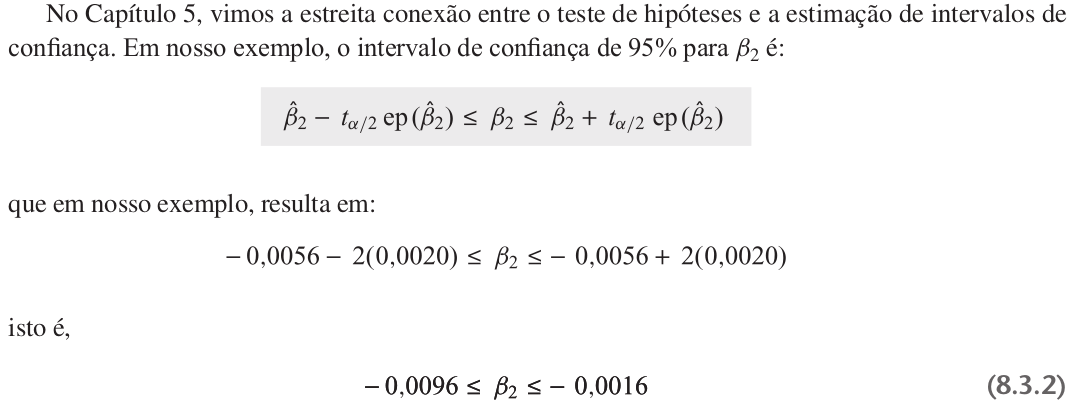

In [41]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/secao_8.3_1.png')

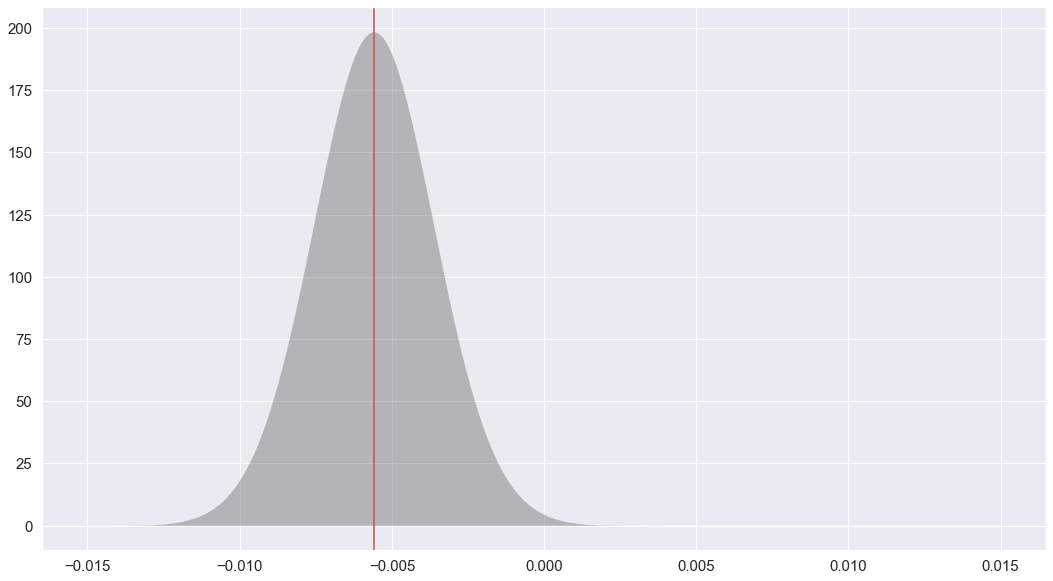

In [42]:
plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -0.015,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'gray', alpha = 0.5 );

# beta2 = -0.0056
plt.axvline( x = -0.0056, color = 'r', linestyle = '-' );

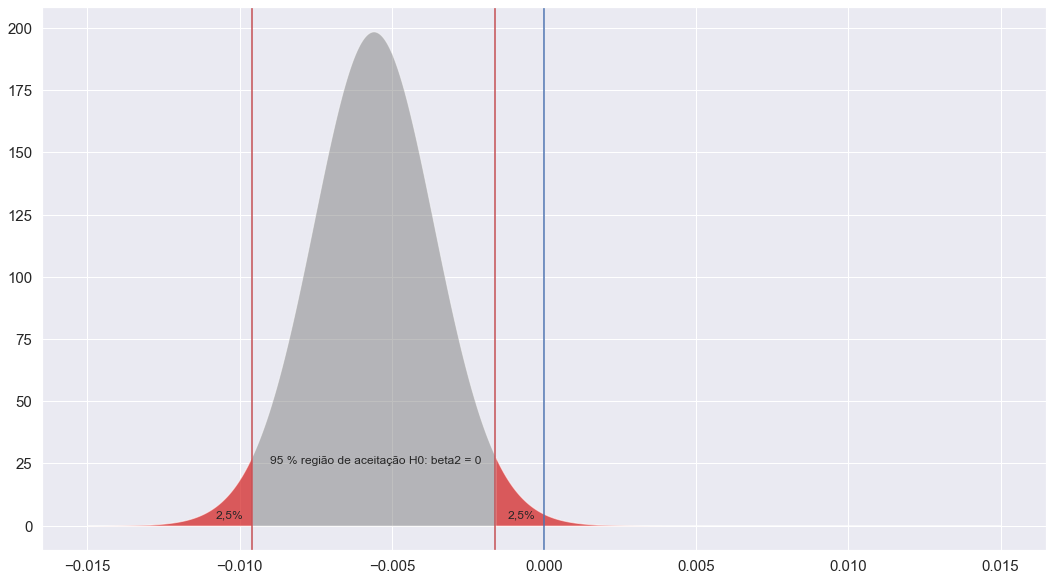

In [43]:
plt.figure( figsize = (18,10) )

# Curva
domain = np.linspace( -0.015,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'gray', alpha = 0.5 );

# tabela - nivel significância 5% teste Bicaudal
domain = np.linspace( -0.015,-0.0096,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'red', alpha = 0.5 );

domain = np.linspace( -0.0016,0.015,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, df = 60, loc = -0.0056, scale = 0.0020),
                  facecolor = 'red', alpha = 0.5 );

#plt.axvline( x = -0.0056, color = 'r', linestyle = '-' );
plt.axvline( x = -0.0096, color = 'r', linestyle = '-' );
plt.axvline( x = -0.0016, color = 'r', linestyle = '-' );
plt.axvline( x = 0, color = 'b', linestyle = '-' );

plt.text( x= -0.0090, y= 25, s = "95 % região de aceitação H0: beta2 = 0");
plt.text( x=  -0.0012, y= 3, s = "2,5%");
plt.text( x=  -0.0108, y= 3, s = "2,5%");

In [44]:
# Nível de significancia em 1%
stats.t.interval( alpha = 0.99, df = 60, loc = -0.0056, scale = 0.0020 )

(-0.010920566062301372, -0.0002794339376986279)

In [45]:
## Grafico erros tipo I e Tipo II

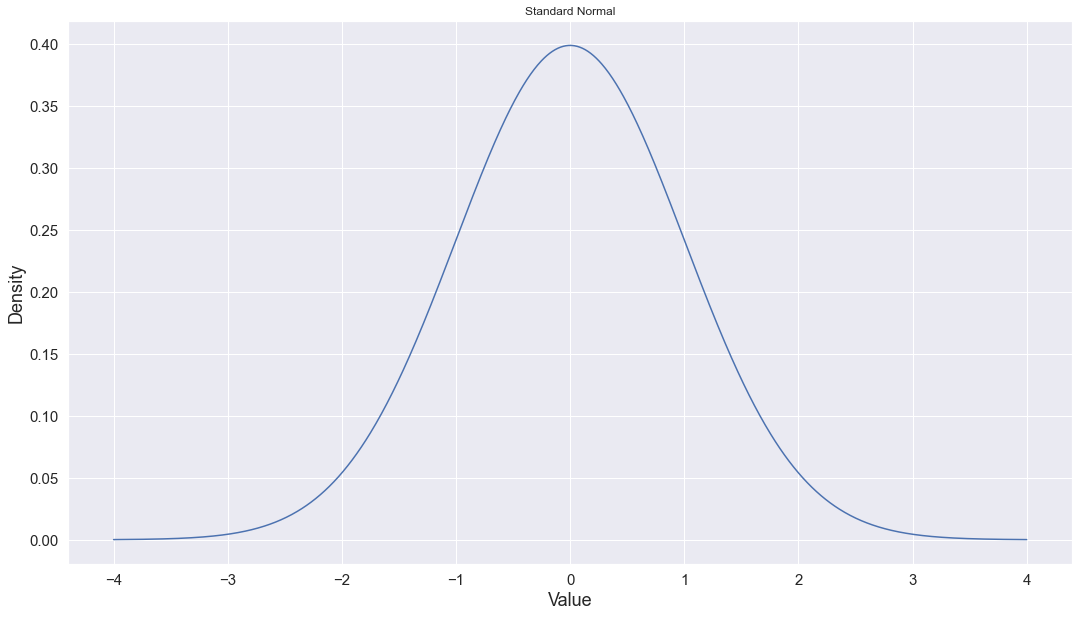

In [46]:
plt.figure( figsize = (18,10) )
domain = np.linspace( -4,4,1000 )
plt.plot(domain, stats.norm.pdf(domain,0,1) )
plt.title("Standard Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

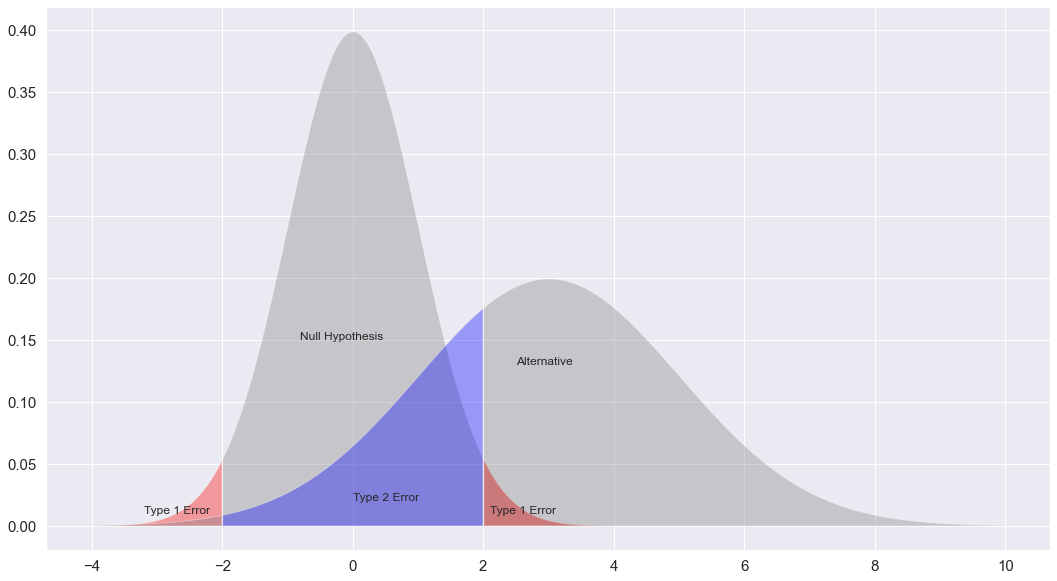

In [47]:
plt.figure( figsize = (18,10) )

plt.fill_between( x = np.arange(-4,-2,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( -4,-2,0.01) ),
                  facecolor = 'red', alpha = 0.35 )

plt.fill_between( x = np.arange(-2,2,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( -2,2,0.01) ),
                  facecolor = 'grey', alpha = 0.35 )

plt.fill_between( x = np.arange(2,4,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( 2,4,0.01) ),
                  facecolor = 'red', alpha = 0.5 )

plt.fill_between( x = np.arange(-4,-2,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( -4,-2,0.01), loc = 3, scale = 2 ),
                  facecolor = 'grey', alpha = 0.35 )

plt.fill_between( x = np.arange(-2,2,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( -2,2,0.01), loc = 3, scale = 2  ),
                  facecolor = 'blue', alpha = 0.35 )

plt.fill_between( x = np.arange(2,10,0.01 ), 
                  y1 = stats.norm.pdf( np.arange( 2,10,0.01), loc = 3, scale = 2  ),
                  facecolor = 'grey', alpha = 0.35 )

plt.text( x= -0.8, y= 0.15, s = "Null Hypothesis");
plt.text( x=  2.5, y= 0.13, s = "Alternative");
plt.text( x=  2.1, y= 0.01, s = "Type 1 Error");
plt.text( x= -3.2, y= 0.01, s = "Type 1 Error");
plt.text( x= 0,    y= 0.02, s = "Type 2 Error");

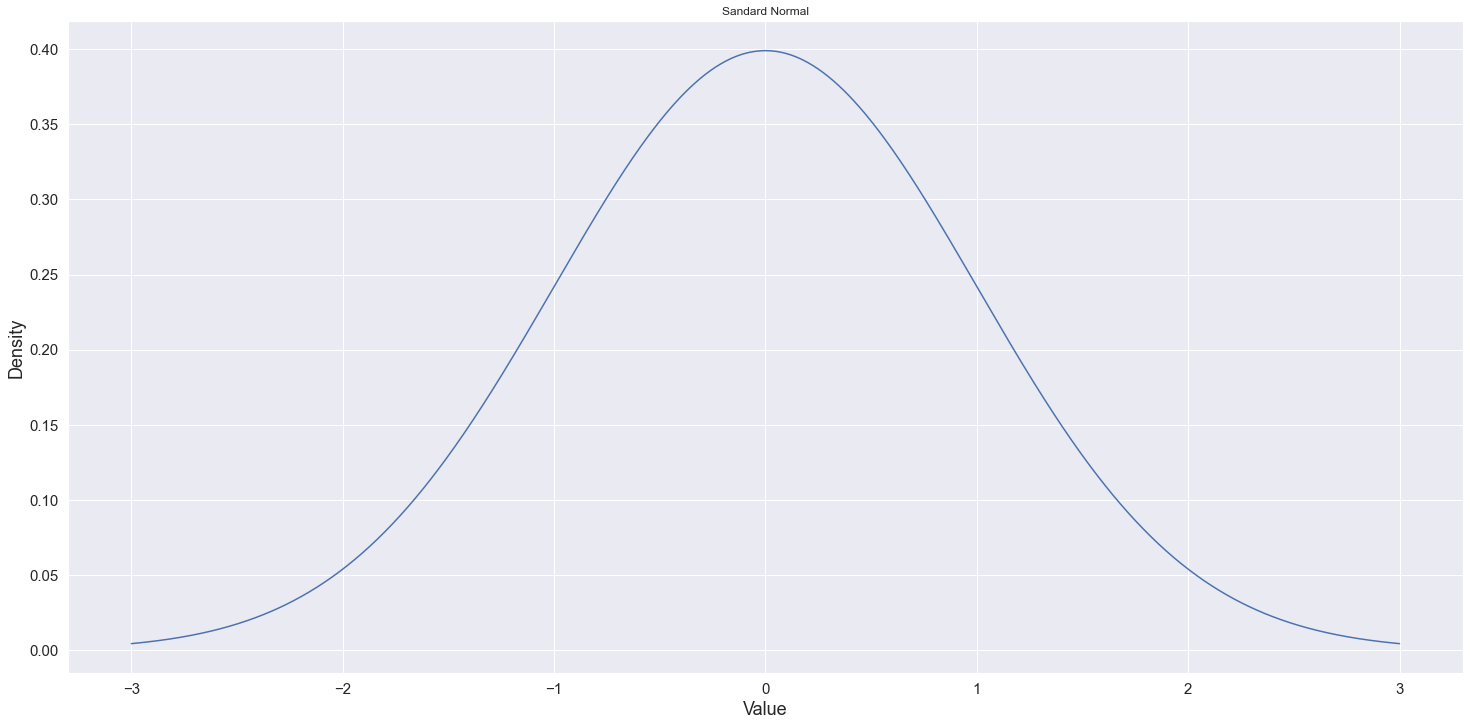

In [48]:
domain = np.linspace( -3,3,1000 )
plt.plot(domain, stats.norm.pdf(domain,0,1) )
plt.title("Sandard Normal")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [49]:
#https://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Econometria_ANOVARegressaoMultipla.pdf